2025-10-08 09:44:48 | PenaltyVision | INFO | __init__:12 | Loading YOLO model: /home/sprochilo/ai_project/PenaltyVisual/checkpoints/best.pt...
2025-10-08 09:44:48 | PenaltyVision | INFO | __init__:20 | Model loaded: /home/sprochilo/ai_project/PenaltyVisual/checkpoints/best.pt
2025-10-08 09:44:48 | PenaltyVision | INFO | __init__:21 | Confidence threshold: 0.5
I0000 00:00:1759916691.083809 2532515 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1759916691.289856 2532714 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 560.35.03), renderer: NVIDIA H100 NVL/PCIe/SSE2
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1759916691.340118 2532643 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1759916691.372051 2532666 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabl

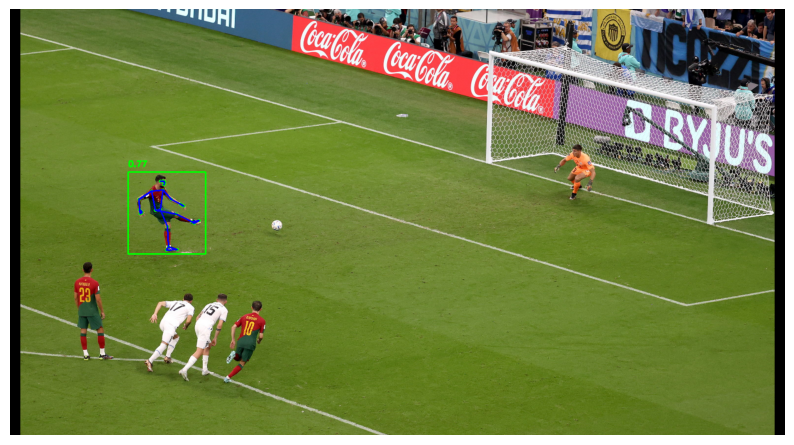

In [1]:
import cv2
import matplotlib.pyplot as plt

from penalty_vision.detection import PlayerDetector, PoseDetection
from penalty_vision.utils import Config
from penalty_vision.utils.frame_utils import resize_frame
from penalty_vision.utils.ioutils import  choice_random_image

config_path = "/home/sprochilo/ai_project/PenaltyVisual/configs/visual_penalty.yaml"
config = Config(config_path)

frame_path = choice_random_image(config.frame_dir)
img = cv2.imread(frame_path)
img = resize_frame(frame=img, target_size=(1420, 780))

player_detector = PlayerDetector(model_name=config.checkpoint_path)
player_detections = player_detector.detect_kicker(frame=img)
frame = player_detector.draw_kicker(img, detections=player_detections)

pose_detection = PoseDetection()
landmarks = pose_detection.extract_pose_landmarks(frame=img, bbox=player_detections[0]['bbox'])
frame = pose_detection.draw_pose(frame, landmarks)
pose_detection.release()

frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 6))
plt.imshow(frame_rgb)
plt.axis('off')
plt.show()